In [17]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

coil = pd.read_csv('dataset/coiltrain.txt', delimiter='\s+', encoding="utf-8")
coil.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [3]:
len(coil.columns)

86

In [4]:
# checking the percentage of missing values in each variable
coil.isnull().sum()/len(coil)*100

MOSTYPE     0.0
MAANTHUI    0.0
MGEMOMV     0.0
MGEMLEEF    0.0
MOSHOOFD    0.0
MGODRK      0.0
MGODPR      0.0
MGODOV      0.0
MGODGE      0.0
MRELGE      0.0
MRELSA      0.0
MRELOV      0.0
MFALLEEN    0.0
MFGEKIND    0.0
MFWEKIND    0.0
MOPLHOOG    0.0
MOPLMIDD    0.0
MOPLLAAG    0.0
MBERHOOG    0.0
MBERZELF    0.0
MBERBOER    0.0
MBERMIDD    0.0
MBERARBG    0.0
MBERARBO    0.0
MSKA        0.0
MSKB1       0.0
MSKB2       0.0
MSKC        0.0
MSKD        0.0
MHHUUR      0.0
           ... 
PGEZONG     0.0
PWAOREG     0.0
PBRAND      0.0
PZEILPL     0.0
PPLEZIER    0.0
PFIETS      0.0
PINBOED     0.0
PBYSTAND    0.0
AWAPART     0.0
AWABEDR     0.0
AWALAND     0.0
APERSAUT    0.0
ABESAUT     0.0
AMOTSCO     0.0
AVRAAUT     0.0
AAANHANG    0.0
ATRACTOR    0.0
AWERKT      0.0
ABROM       0.0
ALEVEN      0.0
APERSONG    0.0
AGEZONG     0.0
AWAOREG     0.0
ABRAND      0.0
AZEILPL     0.0
APLEZIER    0.0
AFIETS      0.0
AINBOED     0.0
ABYSTAND    0.0
CARAVAN     0.0
Length: 86, dtype: float

In [18]:
threshold = 0.7

# Dropping columns with missing value rate higher than threshold
coil = coil[coil.columns[coil.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
coil = coil.loc[coil.isnull().mean(axis=1) < threshold]

In [13]:
coil.var()
# coil = coil[coil.columns[coil.var() < threshold]]

# coil[coil.columns[coil.var()]]

coil["CARAVAN"].var()

0.05621008430190092

In [19]:
# Feature Matrix
X = coil.drop("CARAVAN",1) 
# Target Variable
y = coil["CARAVAN"]         
coil.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10)
rfe = rfe.fit(X, y)

In [21]:
len(rfe.ranking_)

85

In [22]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False, False,  True])

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [23]:
# Religion

# MGODRK - Roman catholic
# MGODPR - Protestant ...
# MGODOV - Other religion
# MGODGE - No religion

# categorize based on religion
coil['RELIGIOUS'] = np.where((coil['MGODRK'] + coil['MGODPR']+ coil['MGODOV']) > coil['MGODGE'], 1, 0)
coil.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,RELIGIOUS
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0,1
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,0,1
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0,1
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,0,1
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,0,1


In [23]:
# Marriage

# 10 MRELGE   Married
# 11 MRELSA   Living together
# 12 MRELOV   Other relation
# 13 MFALLEEN Singles

# categorize based on marriage
coil['MARRIED'] = np.where((coil['MRELSA'] + coil['MRELOV']+ coil['MFALLEEN']) > coil['MRELGE'], 0, 1)
coil.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,MARRIED
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0,1
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,0,1
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,0,1


In [24]:
# Merge HOUSEHOLD_HAS_CHILDREN columns
# 1 - At least a child
# 0 - No child
coil['HOUSEHOLD_HAS_CHILDREN'] = np.where(
    (coil['MFGEKIND']) > coil['MFWEKIND'], 0, 1
)

In [25]:
# Function to pick maximum column value from each row in a dataframe
def merge_max(row_columns):
    a = []
    for row in row_columns:
        a.append(np.where(row == np.max(row))[0][0])
    return a

In [26]:
# Create 'EDUCATION_LEVEL' column with the dominant education level for the customer
# segment.
# 0 - High level education
# 1 - Medium level education
# 2 - Lower level education
education = coil.iloc[:,15:18].values
coil['EDUCATION_LEVEL'] = merge_max(education)

In [27]:
# Create 'OCCUPATION_LEVEL' column with the dominant education level for the customer
# segment.
# 0 - High status
# 1 - Entrepreneur
# 2 - Farmer
# 3 - Middle management
# 4 - Skilled labourers
# 5 - Unskilled labourers
occupation = coil.iloc[:,18:24].values
coil['OCCUPATION_LEVEL'] = merge_max(occupation)

In [28]:
# Create 'SOCIAL_CLASS' column with dominant social class for the customer
# segment.
# 0 - A
# 1 - B1
# 2 - B2
# 3 - C
# 4 - D
social_class = coil.iloc[:,24:29].values
coil['SOCIAL_CLASS'] = merge_max(social_class)

In [29]:
# Create 'HOUSE_OWNERSHIP' column with dominant house ownership for the customer
# segment.
# 0 - Rented House
# 1 - Home Owner
coil['HOUSE_OWNERSHIP'] = np.where(
    (coil['MHHUUR']) > coil['MHKOOP'], 0, 1
)

In [30]:
# Create 'NUMBER_OF_CARS' column with dominant number of cars for the customer
# segment.
# 0 - No Car
# 1 - One Car
# 2 - More than one Car
number_of_cars = pd.concat([coil.iloc[:,33],coil.iloc[:,31:33]],axis=1,join='inner')
coil['NUMBER_OF_CARS'] = merge_max(number_of_cars.values)

In [31]:
# Create 'INSURANCE_TYPE' column with dominant type of insurance for the customer
# segment.
# 0 - National Health Service
# 1 - Private Health Insurance
insurance_type = coil.iloc[:,34:36].values
coil['INSURANCE_TYPE'] = merge_max(insurance_type)

In [32]:
# Create 'INCOME' column with dominant income range for the customer
# segment.
# 0 - Income < 30.000
# 1 - Income 30-45.000
# 2 - Income 45-75.000
# 3 - Income 75-122.000
# 4 - Income >123.000
income = coil.iloc[:,36:41].values
coil['INCOME'] = merge_max(income)

In [33]:
# Create 'CONTRIBUTION_TYPE' column with dominant type of insurance contribution for the customer
# segment.
# 0 -  Contribution private third party insurance see L4
# 1 -  Contribution third party insurance (firms)
# 2 -  Contribution third party insurance (agriculture)
# 3 -  Contribution car policies
# 4 -  Contribution delivery van policies
# 5 -  Contribution motorcycle/scooter policies
# 6 -  Contribution lorry policies
# 7 -  Contribution trailer policies
# 8 -  Contribution tractor policies
# 9 -  Contribution agricultural machines policies
# 10 -  Contribution moped policies
# 11 -  Contribution life insurances
# 12 -  Contribution private accident insurance policies
# 13 -  Contribution family accidents insurance policies
# 14 -  Contribution disability insurance policies
# 15 - Contribution fire policies
# 16 -  Contribution surfboard policies
# 17-  Contribution boat policies
# 18 - Contribution bicycle policies
# 19 -  Contribution property insurance policies
# 20 -  Contribution social security insurance policies

contribution_type = coil.iloc[:,43:64].values
coil['CONTRIBUTION_TYPE'] = merge_max(contribution_type)

In [34]:
# Merge all dataframes to create the new dataset
cleaned_dataset = pd.concat([
    coil.iloc[:,0:5],
    coil.iloc[:,86:],
    coil.iloc[:,85]
],axis=1,join='inner')

In [35]:
# Matrix of features
X = cleaned_dataset.iloc[:,:-1].values
y = cleaned_dataset.iloc[:,-1].values

In [36]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [38]:
print(np.shape(X_train))
print(np.shape(X_test))

(4657, 15)
(1165, 15)


In [39]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [40]:
# # Fit classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [41]:
# Predict
y_pred = classifier.predict(X_test)

In [42]:
# Confusion matrix evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
accuracy = (cm[0][0]+cm[1][1])/np.sum(cm)
accuracy

0.8892703862660944

In [43]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies.mean()
accuracies.std()

0.011611486926635281

/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


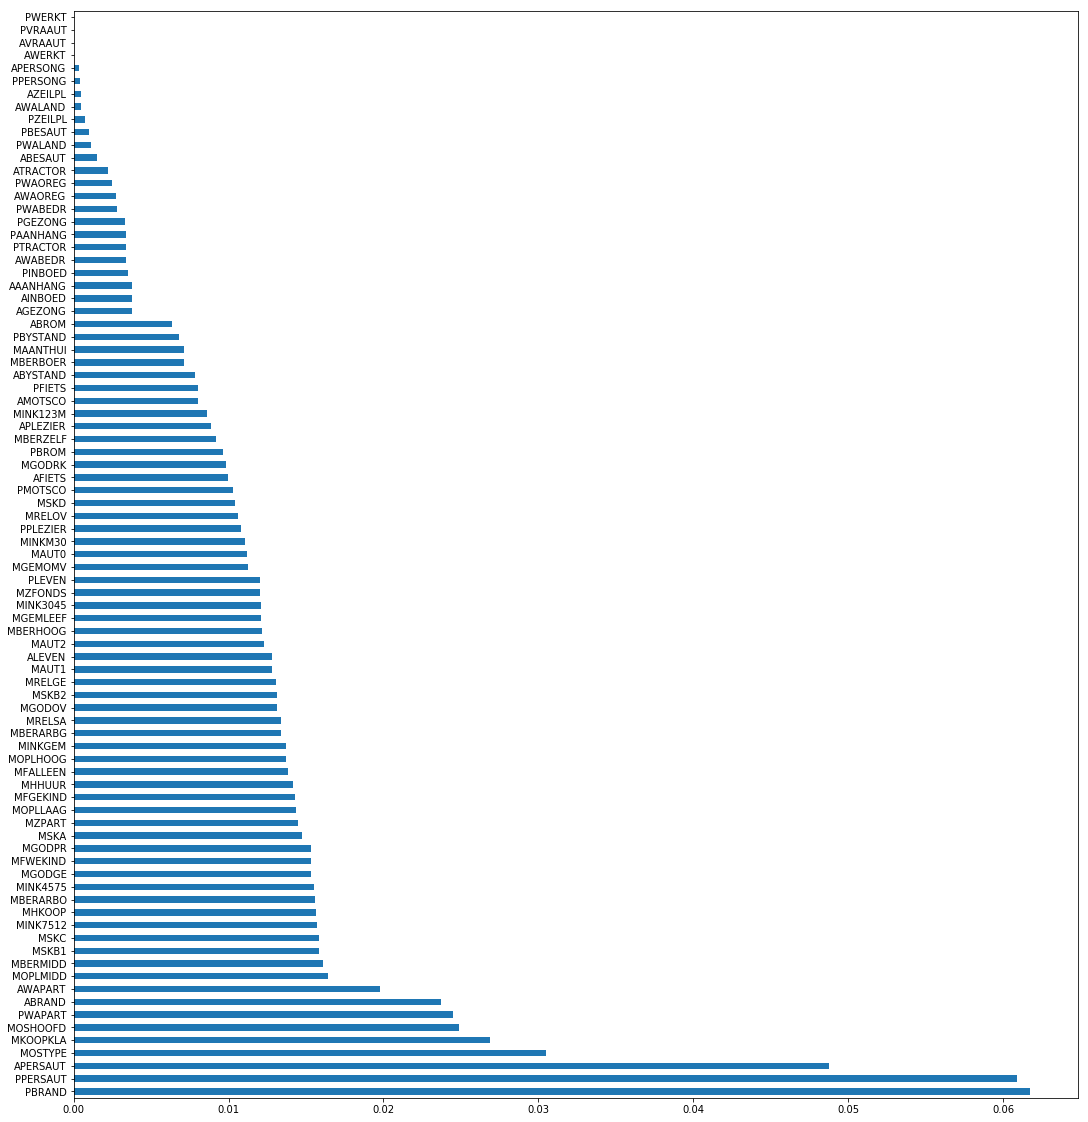

In [4]:
model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_ #use inbuilt class 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
matplotlib.rcParams['figure.figsize'] = (18.0, 20.0)
feat_importances.nlargest(86).plot(kind='barh')
plt.show()